In [1]:
import tensorflow as tf

#tf.__version__
mnist = tf.keras.datasets.mnist # 28x28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

/Users/Shared/devTools/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 1/3
60000/60000 [==============================] - 18s 305us/step - loss: 0.2601 - acc: 0.9243
Epoch 2/3
60000/60000 [==============================] - 16s 259us/step - loss: 0.1067 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 16s 273us/step - loss: 0.0711 - acc: 0.9775


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 96us/step
0.0970799470603466 0.9702


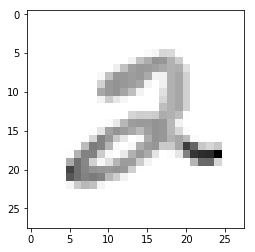

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap =  plt.cm.binary)
plt.show()
print(x_train[5])

In [5]:
model.save('epic_num_reader.model')

In [6]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [7]:
predictions = new_model.predict([x_test])

In [8]:
print(predictions)

[[9.12308273e-09 1.13430424e-07 2.35946245e-05 ... 9.99935865e-01
  1.92152314e-07 5.22697349e-07]
 [6.95123887e-08 3.48635903e-03 9.96425450e-01 ... 3.70519038e-09
  1.02909394e-06 2.30091987e-10]
 [4.72474397e-08 9.99682546e-01 3.18505809e-05 ... 3.17548620e-05
  2.35375148e-04 6.60381147e-07]
 ...
 [4.01446044e-07 2.18679133e-07 1.06643107e-07 ... 3.54676195e-05
  2.02011597e-06 2.32091697e-04]
 [1.30864019e-05 5.39162193e-06 5.52941458e-07 ... 9.90875105e-06
  2.52838526e-03 6.38787085e-08]
 [1.28545457e-06 2.34804773e-07 2.24933920e-05 ... 1.62384364e-08
  8.03364765e-06 2.18115332e-07]]


In [11]:
import numpy as np

print(np.argmax(predictions[10]))

9


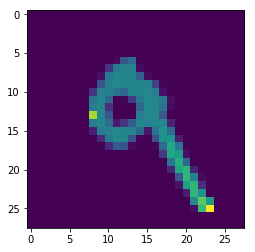

In [12]:
plt.imshow(x_test[7])
plt.show()